In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from PIL import Image


In [3]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.18.0
Num GPUs Available: 1


In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76764 files belonging to 39 classes.


2025-03-02 19:02:09.245154: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-03-02 19:02:09.245340: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-02 19:02:09.245346: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1740921429.245705 14000643 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1740921429.245903 14000643 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 39), dtype=tf.float32, name=None))>

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 24041 files belonging to 39 classes.


In [9]:
for x,y in training_set:    
    print(x,x.shape)    
    print(y,y.shape)    
    break

tf.Tensor(
[[[[126.25      108.25      108.25     ]
   [132.25      114.25      114.25     ]
   [134.5       116.5       116.5      ]
   ...
   [159.75      148.75      146.75     ]
   [162.25      151.25      149.25     ]
   [165.75      154.75      152.75     ]]

  [[133.        115.        115.       ]
   [123.25      105.25      105.25     ]
   [115.75       97.75       97.75     ]
   ...
   [155.5       144.5       142.5      ]
   [158.75      147.75      145.75     ]
   [163.75      152.75      150.75     ]]

  [[121.5       103.5       103.5      ]
   [121.        103.        103.       ]
   [132.        114.        114.       ]
   ...
   [159.25      148.25      146.25     ]
   [155.        144.        142.       ]
   [157.75      146.75      144.75     ]]

  ...

  [[149.75      138.75      144.75     ]
   [143.75      132.75      138.75     ]
   [141.5       130.5       136.5      ]
   ...
   [188.75      179.75      182.75     ]
   [193.75      184.75      187.75     ]
   [1

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomBrightness, Rescaling

# Define augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Randomly flips images horizontally
    RandomRotation(0.2),       # Rotates images up to 20% of 360 degrees
    RandomZoom(0.2),           # Zooms images in/out up to 20%
    RandomBrightness(0.2)      # Adjusts brightness randomly
])

# Apply to training dataset
training_set = training_set.map(lambda x, y: (data_augmentation(x), y))


In [14]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25)) # To avoid Overfitting
model.add(Flatten())

In [22]:
model.add(Dense(units=1500,activation='relu'))

In [23]:
model.add(Dropout(0.4))

In [24]:
#Output Layer
model.add(Dense(units=39,activation='softmax'))

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │        58,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,844,263 (29.92 MB)

 Trainable params: 7,844,263 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2025-03-02 19:02:30.658556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2399/2399 ━━━━━━━━━━━━━━━━━━━━ 443s 183ms/step - accuracy: 0.3023 - loss: 2.5660 - val_accuracy: 0.7284 - val_loss: 0.9258
Epoch 2/10
2399/2399 ━━━━━━━━━━━━━━━━━━━━ 309s 129ms/step - accuracy: 0.7162 - loss: 0.9509 - val_accuracy: 0.8290 - val_loss: 0.6285
Epoch 3/10
2399/2399 ━━━━━━━━━━━━━━━━━━━━ 313s 130ms/step - accuracy: 0.8136 - loss: 0.6137 - val_accuracy: 0.8838 - val_loss: 0.4053
Epoch 4/10
2399/2399 ━━━━━━━━━━━━━━━━━━━━ 321s 134ms/step - accuracy: 0.8568 - loss: 0.4667 - val_accuracy: 0.8581 - val_loss: 0.5289
Epoch 5/10
2399/2399 ━━━━━━━━━━━━━━━━━━━━ 318s 132ms/step - accuracy: 0.8874 - loss: 0.3720 - val_accuracy: 0.9217 - val_loss: 0.2802
Epoch 6/10
2399/2399 ━━━━━━━━━━━━━━━━━━━━ 329s 137ms/step - accuracy: 0.9033 - loss: 0.3237 - val_accuracy: 0.9461 - val_loss: 0.1894
Epoch 7/10
2399/2399 ━━━━━━━━━━━━━━━━━━━━ 329s 137ms/step - accuracy: 0.9167 - loss: 0.2733 - val_accuracy: 0.9394 - val_loss: 0.2198
Epoch 8/10
2399/2399 ━━━━━━━━━━━━━━━━━━━━ 327s 136ms/step - accuracy: 0.9

In [28]:
train_loss,train_acc = model.evaluate(training_set)

2399/2399 ━━━━━━━━━━━━━━━━━━━━ 94s 39ms/step - accuracy: 0.9480 - loss: 0.1698 


In [29]:
print(train_loss,train_acc)

0.16003353893756866 0.9500547051429749


In [30]:
val_loss,val_acc = model.evaluate(validation_set)

752/752 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9568 - loss: 0.1464


In [31]:
print(val_loss,val_acc)

0.14387932419776917 0.9582380056381226


In [51]:
model.save("plant_trained_model.keras")

In [42]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 24041 files belonging to 39 classes.


In [43]:
y_pred=model.predict(test_set)
y_pred, y_pred.shape

752/752 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step


(array([[9.99966621e-01, 2.85054369e-10, 1.25457110e-12, ...,
         2.65024062e-11, 4.92871152e-13, 6.97064422e-13],
        [9.99523044e-01, 7.44576123e-10, 9.63765352e-12, ...,
         1.58744240e-10, 3.83455385e-11, 1.47540279e-11],
        [1.00000000e+00, 1.39890129e-12, 8.43727401e-16, ...,
         2.18275725e-17, 1.01196846e-16, 8.18399507e-15],
        ...,
        [1.54862153e-13, 5.44078654e-15, 9.40692619e-13, ...,
         3.88186348e-15, 8.59928600e-16, 9.99999762e-01],
        [4.84156647e-14, 2.13469921e-14, 4.58263072e-12, ...,
         5.03520023e-14, 8.06568015e-14, 9.99999762e-01],
        [6.46277556e-08, 2.02686379e-09, 2.40139684e-06, ...,
         3.16036708e-09, 1.81053576e-06, 9.97954488e-01]], dtype=float32),
 (24041, 39))

In [44]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(24041,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38])>

In [45]:
true_categories=tf.concat([y for x, y in test_set], axis=0)
true_categories

2025-03-02 20:42:09.808063: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(24041, 39), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [46]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(24041,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38])>

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(Y_true, predicted_categories, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.89      0.94       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       440
                                   Apple___healthy       1.00      0.87      0.93       502
                               Blueberry___healthy       0.95      0.95      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.90      0.91       410
                       Corn_(maize)___Common_rust_       0.94      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

In [59]:
import pathlib

data_dir = pathlib.Path("/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train")  # Use absolute path if necessary
print("Data Directory exists:", data_dir.exists())  # Check if the directory exists
print("Subdirectories in the Data Directory:", list(data_dir.glob('*')))  # List subdirectories


Data Directory exists: True
Subdirectories in the Data Directory: [PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Strawberry___healthy'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Grape___Black_rot'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Potato___Early_blight'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Blueberry___healthy'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Corn_(maize)___healthy'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Tomato___Target_Spot'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/.DS_Store'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Peach___healthy'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Potato___Late_blight'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train/Tomato___Late_blight'), PosixPath('/Users/sneharaut/Desktop/Plant_Disease_

In [60]:
# Get the class names sorted by their folder names
data_dir = pathlib.Path("/Users/sneharaut/Desktop/Plant_Disease_Dataset-2/train")
class_names = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])

# Print the sorted class names
print(class_names)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your saved model
model = tf.keras.models.load_model('plant_trained_model.keras')

# Load test data (assuming stored in folders by class name)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    image_size=(128, 128),
    batch_size=32,
    shuffle=False  # Important for keeping order of labels
)

# Get true labels
true_labels = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)

# Predict
pred_probs = model.predict(test_dataset)
pred_labels = np.argmax(pred_probs, axis=1)


Found 17572 files belonging to 38 classes.


2025-05-19 10:58:04.760110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


550/550 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step


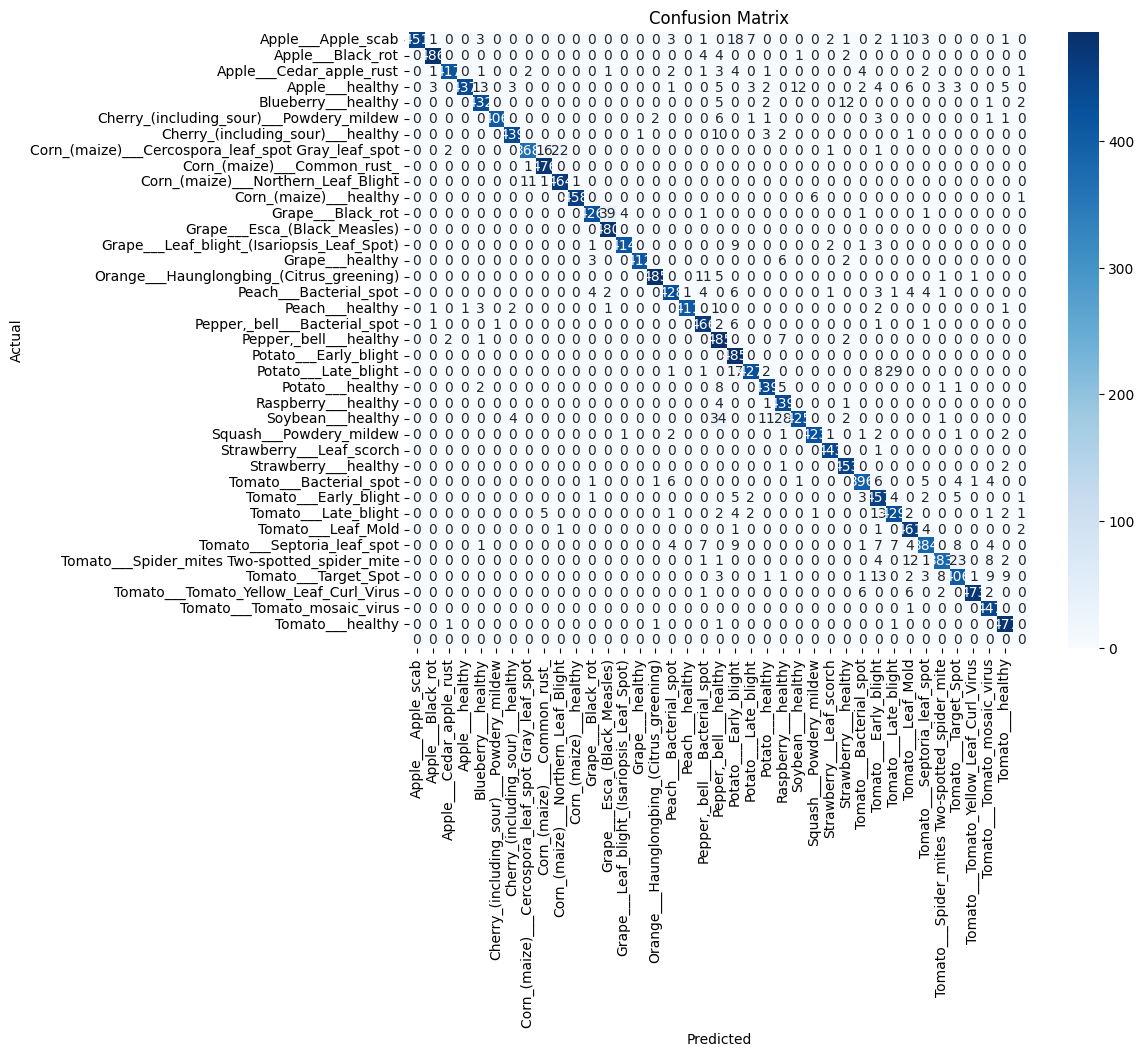

In [16]:
cm = confusion_matrix(true_labels, pred_labels)
class_names = test_dataset.class_names

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

